# SAE weights exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sprint.loading import load_sae
import matplotlib.pyplot as plt

/opt/conda/envs/sprint/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# What are the SAE weights like, anyway? Are they sparse?

sae = load_sae()
print(sae.W_enc.shape)

{'batch_size': 4096,
 'beta1': 0.9,
 'beta2': 0.99,
 'buffer_batches': 12288,
 'buffer_mult': 384,
 'buffer_size': 1572864,
 'd_mlp': 2048,
 'dict_mult': 8,
 'enc_dtype': 'fp32',
 'l1_coeff': 0.0003,
 'lr': 0.0001,
 'model_batch_size': 512,
 'num_tokens': 2000000000,
 'seed': 52,
 'seq_len': 128}
Encoder device: cuda:0
torch.Size([2048, 16384])


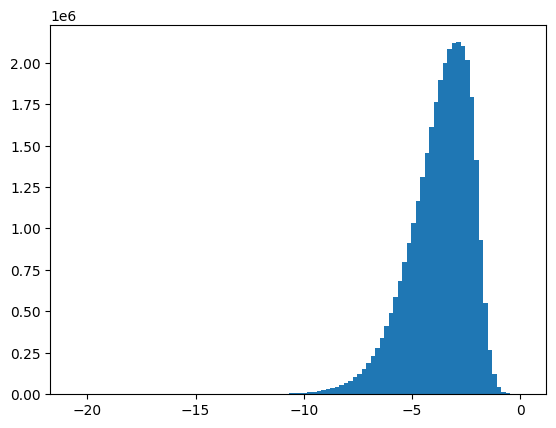

In [4]:
# What is the distribution of weights? - this takes 2-3 minutes to run

plt.hist(sae.W_enc.flatten().detach().cpu().abs().log(), bins=100)
plt.show()

In [5]:
# What fraction of weights are zero?

print("Fraction of weights that are zero: ", (sae.W_enc == 0).sum() / sae.W_enc.numel())

Fraction of weights that are zero:  tensor(0., device='cuda:0')


In [13]:
for i in range(5):
    print(
        f"{(sae.W_enc.abs() < 10 ** -i).sum().item() / sae.W_enc.numel() * 100:.2f}% of weights are less than 10**-{i}"
    )

100.00% of weights are less than 10**-0
85.44% of weights are less than 10**-1
23.97% of weights are less than 10**-2
3.02% of weights are less than 10**-3
0.30% of weights are less than 10**-4


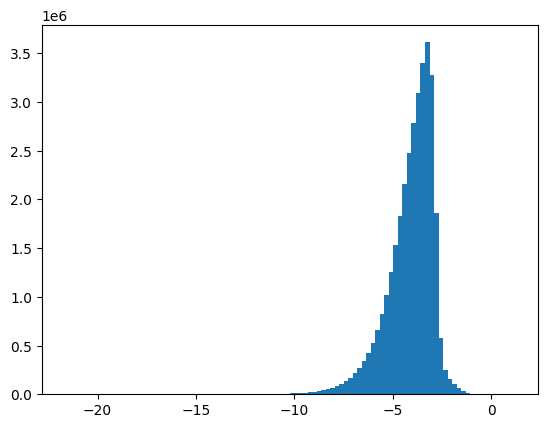

In [15]:
# Let's histogram the decoder weights too

plt.hist(sae.W_dec.flatten().detach().cpu().abs().log(), bins=100)
plt.show()

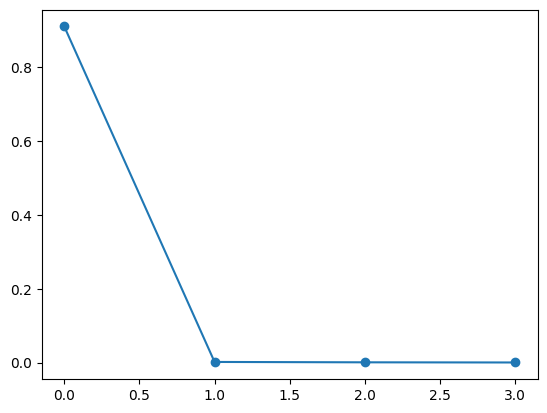

In [22]:
# Does PCA on the weights give us anything interesting?

from re import M
from sklearn.decomposition import PCA

pca = PCA(n_components=sae.W_enc.shape[0])
pca.fit(sae.W_enc.detach().cpu().numpy())

plt.plot(pca.explained_variance_ratio_[:4], marker="o")
plt.show()

In [17]:
pca.explained_variance_ratio_

array([9.0945858e-01, 1.9619162e-03, 9.7038504e-04, 5.3555198e-04,
       4.7893805e-04, 4.2972260e-04, 3.9391295e-04, 3.1944423e-04,
       3.0278374e-04, 2.3634789e-04, 2.1830921e-04, 1.9770791e-04,
       1.8731460e-04, 1.6345401e-04, 1.5438395e-04, 1.5135265e-04,
       1.4401367e-04, 1.3880576e-04, 1.3683691e-04, 1.3157120e-04],
      dtype=float32)

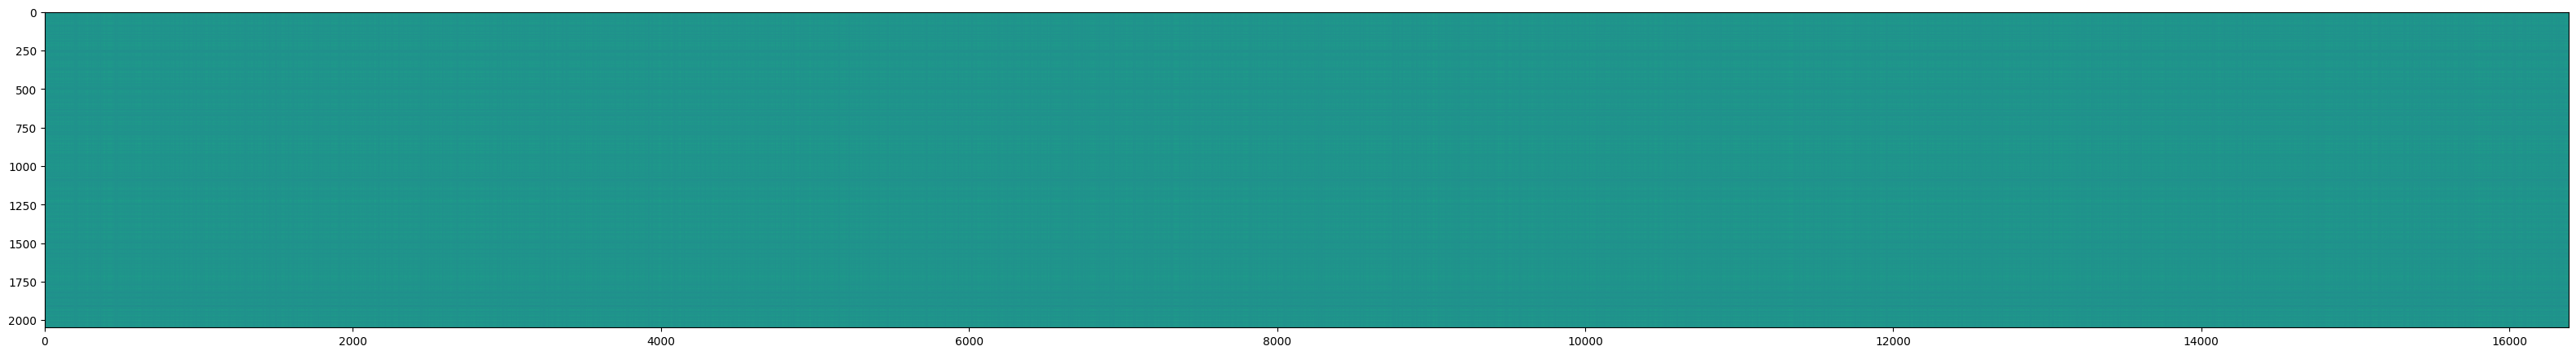

In [26]:
fig = plt.figure(figsize=(40, 10))
plt.imshow(sae.W_enc.detach().cpu().numpy())
plt.show()